#Homework Solution - Regression


In [4]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import math

from scipy import stats
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import RobustScaler

%matplotlib inline


print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  1.24.3
pandas version :  1.5.3
seaborn version :  0.12.2


In [5]:
# Import Dataset
df = pd.read_excel('youtube_statistics.xlsx')
df.head()

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,No_tags,desc_len,len_title,publish_date
0,2017-11-14,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,12:20:39,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,False,False,False,Presenting Sharry Mann latest Punjabi Song Cu...,15,920,81,2017-11-12
1,2017-11-14,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,05:43:56,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,True,False,False,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",19,2232,58,2017-11-13
2,2017-11-14,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,15:48:08,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,False,False,False,Watch Stylish Star Allu Arjun @ ChaySam Weddin...,14,482,58,2017-11-12
3,2017-11-14,Eruma Saani | Tamil vs English,Eruma Saani,23,07:08:48,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,2684,False,False,False,This video showcases the difference between pe...,20,263,30,2017-11-12
4,2017-11-14,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,01:14:16,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492,293,66,False,False,False,why Samantha became EMOTIONAL @ Samantha naga ...,11,753,88,2017-11-13


## Exploratory Data Analysis (EDA)

---



In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36791 entries, 0 to 36790
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   trending_date           36791 non-null  object        
 1   title                   36791 non-null  object        
 2   channel_title           36791 non-null  object        
 3   category_id             36791 non-null  int64         
 4   publish_time            36791 non-null  object        
 5   tags                    36791 non-null  object        
 6   views                   36791 non-null  int64         
 7   likes                   36791 non-null  int64         
 8   dislikes                36791 non-null  int64         
 9   comment_count           36791 non-null  int64         
 10  comments_disabled       36791 non-null  bool          
 11  ratings_disabled        36791 non-null  bool          
 12  video_error_or_removed  36791 non-null  bool  

Dari df.info diatas, kita dapat mengetahui tipe data dari tiap fiturnya dan juga dapat diketahui pula jumlah data dari tiap fitur. Di dalam df.info juga dapat dilihat jumlah nilai yang berbeda, hal ini dapat disebabkan karena nilai kosong atau missing value.

In [7]:
cats = ['trending_date','title','channel_title','publish_time','tags','comments_disabled','ratings_disabled','video_error_or_removed',
       'description','publish_date']
nums = ['category_id','views','likes','dislikes','comment_count','No_tags','desc_len','len_title']

In [8]:
# Ubah data Numerik ke data numeric object
numerics = ['int8','int16', 'int32', 'int64', 'float16', 'float32', 'float64']
display(df.select_dtypes(include=numerics).columns)
print(df.select_dtypes(include=numerics).shape)
data_num = df.select_dtypes(include=numerics)
data_num.head(3)

Index(['category_id', 'views', 'likes', 'dislikes', 'comment_count', 'No_tags',
       'desc_len', 'len_title'],
      dtype='object')

(36791, 8)


,category_id,views,likes,dislikes,comment_count,No_tags,desc_len,len_title
0,1,1096327,33966,798,882,15,920,81
1,25,590101,735,904,0,19,2232,58
2,24,473988,2011,243,149,14,482,58


In [9]:
# Ubah data kategorik ke data object
display(df.select_dtypes(include=['object']).columns)
print(df.select_dtypes(include=object).shape)
data_cat = df.select_dtypes(include=['object'])
data_cat.head(3)

Index(['trending_date', 'title', 'channel_title', 'publish_time', 'tags',
       'description'],
      dtype='object')

(36791, 6)


,trending_date,title,channel_title,publish_time,tags,description
0,2017-11-14,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,12:20:39,"sharry mann|""sharry mann new song""|""sharry man...",Presenting Sharry Mann latest Punjabi Song Cu...
1,2017-11-14,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,05:43:56,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...","पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं..."
2,2017-11-14,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,15:48:08,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,Watch Stylish Star Allu Arjun @ ChaySam Weddin...


In [10]:
df.isnull().sum()

trending_date              0
title                      0
channel_title              0
category_id                0
publish_time               0
tags                       0
views                      0
likes                      0
dislikes                   0
comment_count              0
comments_disabled          0
ratings_disabled           0
video_error_or_removed     0
description               45
No_tags                    0
desc_len                   0
len_title                  0
publish_date               0
dtype: int64

Terdapat kolom yang memiliki missing value yaitu description sebanyak 45.

In [11]:
df.describe(include=[np.number])

,category_id,views,likes,dislikes,comment_count,No_tags,desc_len,len_title
count,36791.000000,3.679100e+04,3.679100e+04,3.679100e+04,36791.000000,36791.000000,36791.000000,36791.000000
mean,21.552173,1.071490e+06,2.745069e+04,1.685363e+03,2714.022043,18.938463,923.079123,70.609361
std,6.586716,3.207149e+06,9.783129e+04,1.619732e+04,14978.114328,9.843531,815.038867,22.409174
min,1.000000,4.024000e+03,0.000000e+00,0.000000e+00,0.000000,1.000000,3.000000,5.000000
25%,23.000000,1.256040e+05,8.790000e+02,1.090000e+02,83.000000,12.000000,368.000000,53.000000
50%,24.000000,3.078360e+05,3.126000e+03,3.310000e+02,336.000000,19.000000,677.000000,74.000000
75%,24.000000,8.066315e+05,1.409500e+04,1.032000e+03,1314.500000,25.000000,1237.000000,91.000000
max,43.000000,1.254322e+08,2.912710e+06,1.545017e+06,827755.000000,72.000000,5136.000000,100.000000


- Performa Video Yang Signifikan:<br>
  Video-vIdeo dalam dataset memiliki rata-rata 1.07 juta views, dengan jumlah likes rata-rata sekitar 27,450. Namun, terdapat variasi yang besar dalam respons penonton, ditunjukkan oleh standar deviasi yang tinggi untuk views dan likes. Video dengan jumlah views tertinggi mencapai 125 juta, menunjukkan bahwa ada beberapa video yang sangat populer.<br>

- Partisipasi Aktif Penonton:<br>
  Meskipun rata-rata jumlah komentar per video adalah 2,714, distribusi data menunjukkan bahwa ada video dengan jumlah komentar mencapai 827,755. Hal ini menunjukkan partisipasi aktif dan beragamnya interaksi penonton terhadap konten video.

- Pola Interaksi yang Bervariasi: <br>
  Terdapat variasi yang signifikan dalam interaksi penonton, terlihat dari rentang nilai minimum hingga maksimum pada likes (0 hingga 2,912,710) dan dislikes (0 hingga 1,545,017). Ini menunjukkan bahwa video-video dalam dataset ini mendapat respon yang sangat berbeda dari penonton, dengan beberapa video mendapatkan sangat banyak likes namun juga dislikes yang signifikan.

In [12]:
df.describe(exclude=[np.number])

,trending_date,title,channel_title,publish_time,tags,comments_disabled,ratings_disabled,video_error_or_removed,description,publish_date
count,36791,36791,36791,36791,36791,36791,36791,36791,36746,36791
unique,205,16431,1390,12375,12463,2,2,2,13979,219
top,2017-12-23,Mission: Impossible - Fallout (2018) - Officia...,VikatanTV,04:30:00,[none],False,False,False,Subscribers Link: http://bit.ly/2qb69dZ\n\nCon...,2018-05-17 00:00:00
freq,199,19,284,333,1120,35611,36034,36780,166,318
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-05-27 00:00:00
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-06-13 00:00:00


- Popularitas Konten Serupa:<br>
  Dalam dataset ini, terdapat pola bahwa beberapa konten video memiliki popularitas yang tinggi, tercermin dari judul video. Sebagai contoh, judul "Mission: Impossible - Fallout (2018) - Official Trailer" muncul sebanyak 19 kali, menunjukkan popularitas video ini di platform tersebut.

- Variasi dalam Penggunaan Fitur:<br>
  Dataset ini mencakup variasi dalam penggunaan fitur-fitur pada platform, seperti pengaktifan atau non-aktifnya opsi komentar (comments_disabled), rating (ratings_disabled), dan status video (video_error_or_removed). Sebagian besar video memiliki komentar yang diaktifkan dan rating yang aktif. Namun, ada juga beberapa video yang memiliki fitur-fitur ini dinonaktifkan, menunjukkan bahwa pembuat konten memiliki kebijakan yang beragam dalam mengelola interaksi penonton dan umpan balik.

- Konsistensi dan Perubahan Waktu:<br>
  Data menunjukkan bahwa tanggal-tanggal trending (trending_date) berkisar sepanjang periode pengamatan, tetapi ada variasi dalam jumlah video yang trending setiap hari. Selain itu, data mengindikasikan perubahan dalam jumlah video yang diunggah setiap hari (publish_date) dari Mei 2017 hingga Juni 2018. Analisis lebih lanjut mengenai faktor-faktor yang memengaruhi popularitas video di berbagai periode waktu bisa memberikan wawasan tentang tren dan preferensi penonton seiring berjalannya waktu.

### **a.  Univariate Analysis**

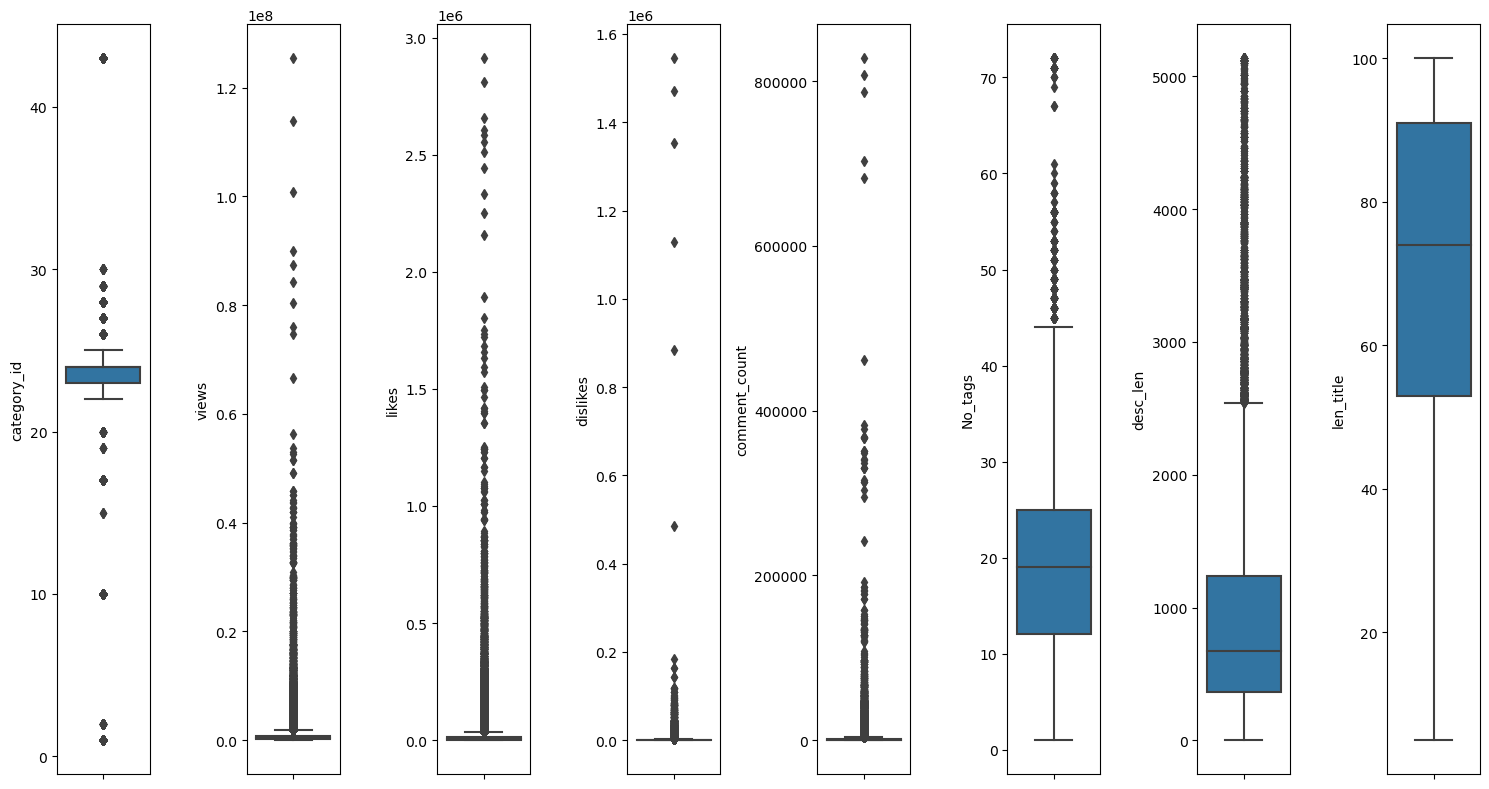

In [13]:
plt.figure(figsize=(15,8))
for i in range(0,len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.boxplot(y = df[nums[i]])
    plt.tight_layout()

Berdasarkan Boxplot di atas : <br>

- Views (Jumlah Penayangan): Dalam kolom 'views', kita dapat melihat bahwa terdapat banyak outlier. Ini menunjukkan bahwa sebagian besar video memiliki jumlah penayangan yang rendah, tetapi ada beberapa video yang sangat populer dengan jumlah penayangan yang jauh lebih tinggi dari yang lain.

- Likes (Jumlah Suka): Kolom 'likes' juga memiliki outlier, yang menunjukkan bahwa sebagian besar video memiliki jumlah suka yang relatif rendah, tetapi ada beberapa video yang mendapatkan banyak suka dari penonton.

- Dislikes (Jumlah Tidak Suka): Seperti 'likes', kolom 'dislikes' juga memiliki outlier. Sebagian besar video memiliki jumlah tidak suka yang relatif rendah, tetapi ada beberapa video dengan jumlah tidak suka yang signifikan.

- Comment Count (Jumlah Komentar): Kolom 'comment_count' juga memiliki outlier, menunjukkan bahwa sebagian besar video memiliki jumlah komentar yang terbatas, tetapi ada beberapa video dengan jumlah komentar yang signifikan.

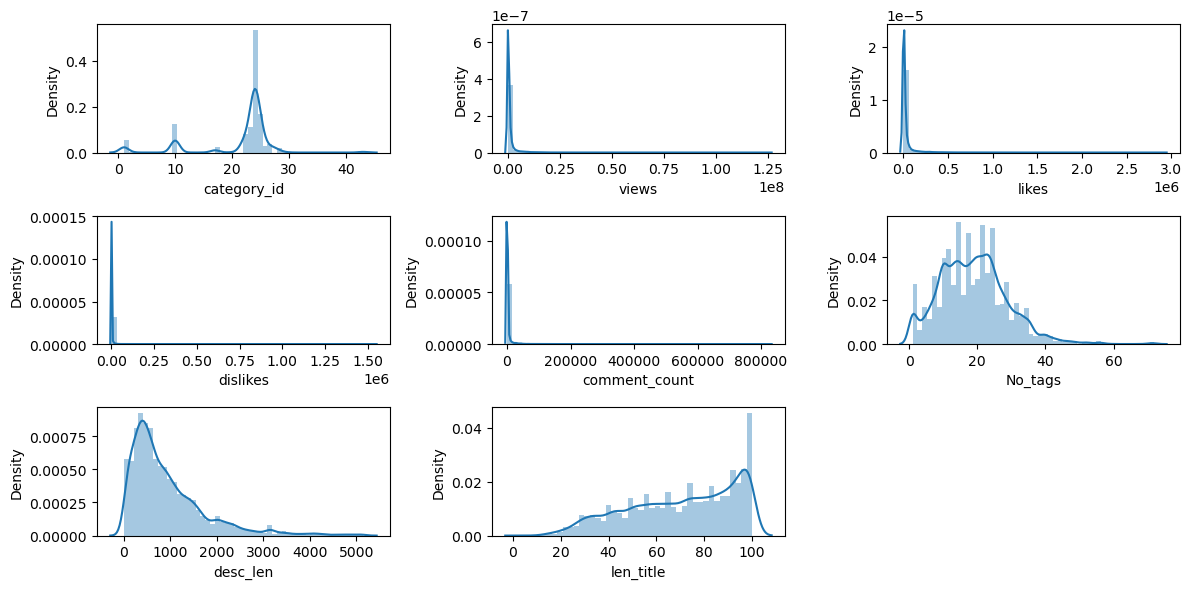

In [14]:
plt.figure(figsize=(12, 6))
for i in range(0, len(nums)):
    plt.subplot(3, 3, i+1)
    sns.distplot(df[nums[i]])
    plt.tight_layout()

Dari distribusi di atas :<br>

mayoritas video memiliki keterlibatan (penayangan, suka, tidak suka, dan komentar) yang terbatas, tetapi ada beberapa video yang sangat sukses dalam hal interaksi dengan penonton. Video-video ini mungkin memiliki konten atau strategi pemasaran yang lebih menarik, sehingga mendapatkan lebih banyak perhatian dan interaksi dari penonton. Dalam analisis lebih lanjut, fokus pada faktor-faktor apa yang membuat video-video ini sukses dapat memberikan wawasan yang lebih mendalam bagi pembuat konten dan pemasar.

### **b. Multivariate Analysis**

<Axes: >

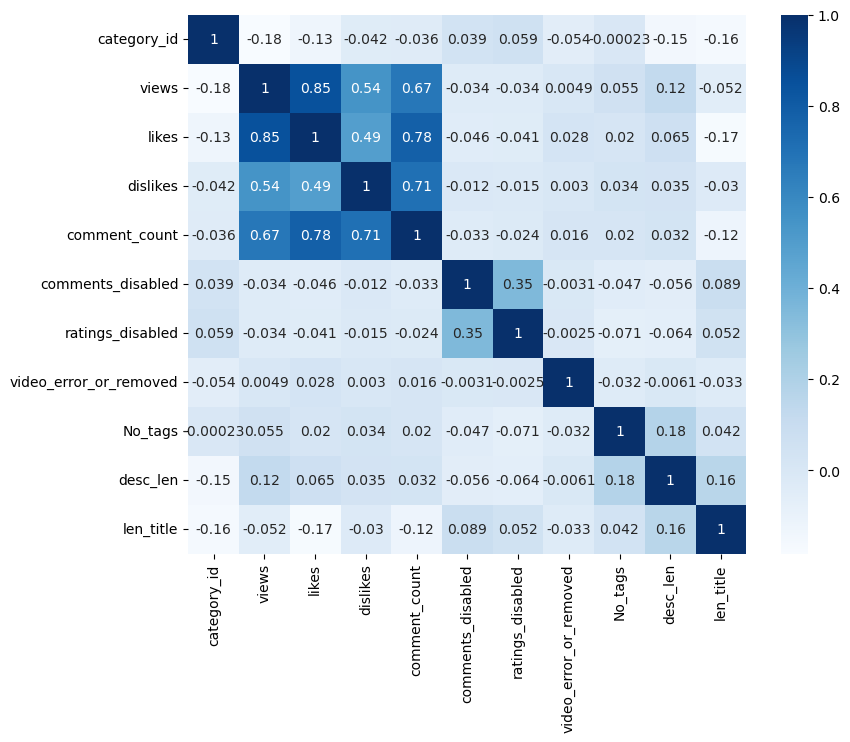

In [15]:
plt.figure(figsize=(9, 7))
sns.heatmap(df.corr(), cmap='Blues', annot=True)

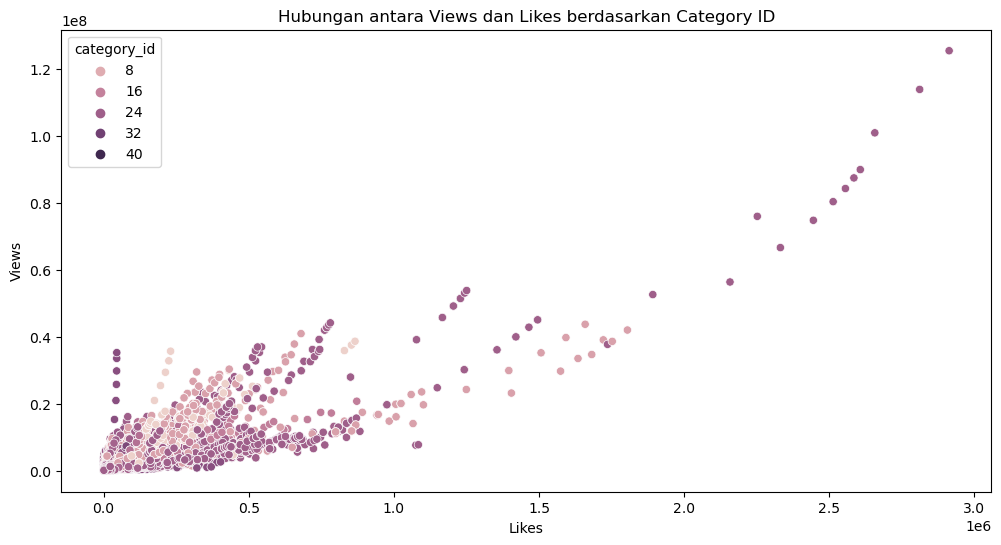

In [16]:
# Hubungan antara views dan likes berdasarkan category_id
plt.figure(figsize=(12, 6))
sns.scatterplot(x='likes', y='views', hue='category_id', data=df)
plt.title('Hubungan antara Views dan Likes berdasarkan Category ID')
plt.xlabel('Likes')
plt.ylabel('Views')
plt.show()

## Preprocessing

---



### Handiling Missing Values

In [17]:
# Memeriksa Missing Value
data_missing_value = df.isnull().sum().reset_index()
data_missing_value.columns = ['feature','missing_value']
data_missing_value

,feature,missing_value
0,trending_date,0
1,title,0
2,channel_title,0
3,category_id,0
4,publish_time,0
5,tags,0
6,views,0
7,likes,0
8,dislikes,0
9,comment_count,0


In [18]:
# Melihat Persentase Missing Value
data_missing_value['percentage'] = round((data_missing_value['missing_value']/len(df))*100,2)
data_missing_value = data_missing_value.sort_values('percentage', ascending=False).reset_index(drop=True)
data_missing_value = data_missing_value[data_missing_value['percentage']>0]
data_missing_value

,feature,missing_value,percentage
0,description,45,0.12


Presentase cukup kecil untuk missing value

###Drop Fitur category_id, publish_date, description, tags, title, channel_title karena memiliki uniqe value yang tinggi

In [19]:
#Melihat unique value untuk categorical data
data_cat_unique = data_cat.nunique().reset_index()
data_cat_unique.columns = ['fitur', 'nilai unik']
data_cat_unique = data_cat_unique.sort_values('nilai unik', ascending=False)
data_cat_unique

,fitur,nilai unik
1,title,16431
5,description,13979
4,tags,12463
3,publish_time,12375
2,channel_title,1390
0,trending_date,205


In [20]:
#drop kolom description, tags, title, channel_title karena memiliki uniqe value yang tinggi
data_clean = df.drop(['publish_date','description','title','channel_title','tags','publish_time'], axis=1)

### Handling Duplicates

In [21]:
#Cek Duplicate Data
data_clean.duplicated().sum()

4229

In [22]:
#drop duplicate data
data_clean = data_clean.drop_duplicates()

In [23]:
#Cek Duplicate Data
data_clean.duplicated().sum()

0

In [24]:
#Apakah ada data duplikat?
data_clean.duplicated().any()

False

### Handling Outliers

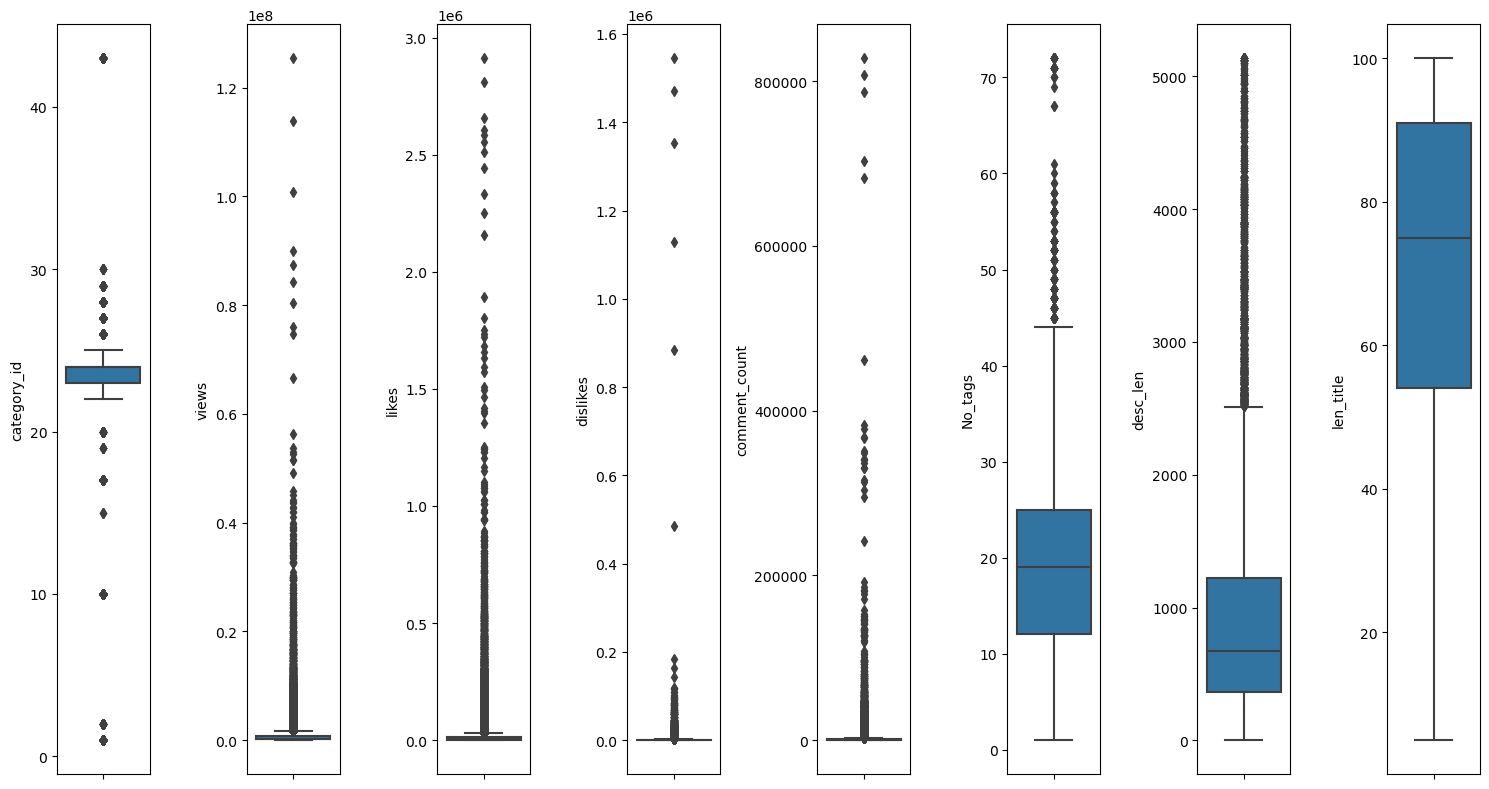

In [25]:
plt.figure(figsize=(15,8))
for i in range(0,len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.boxplot(y = data_clean[nums[i]])
    plt.tight_layout()

Text(0.5, 0, '')

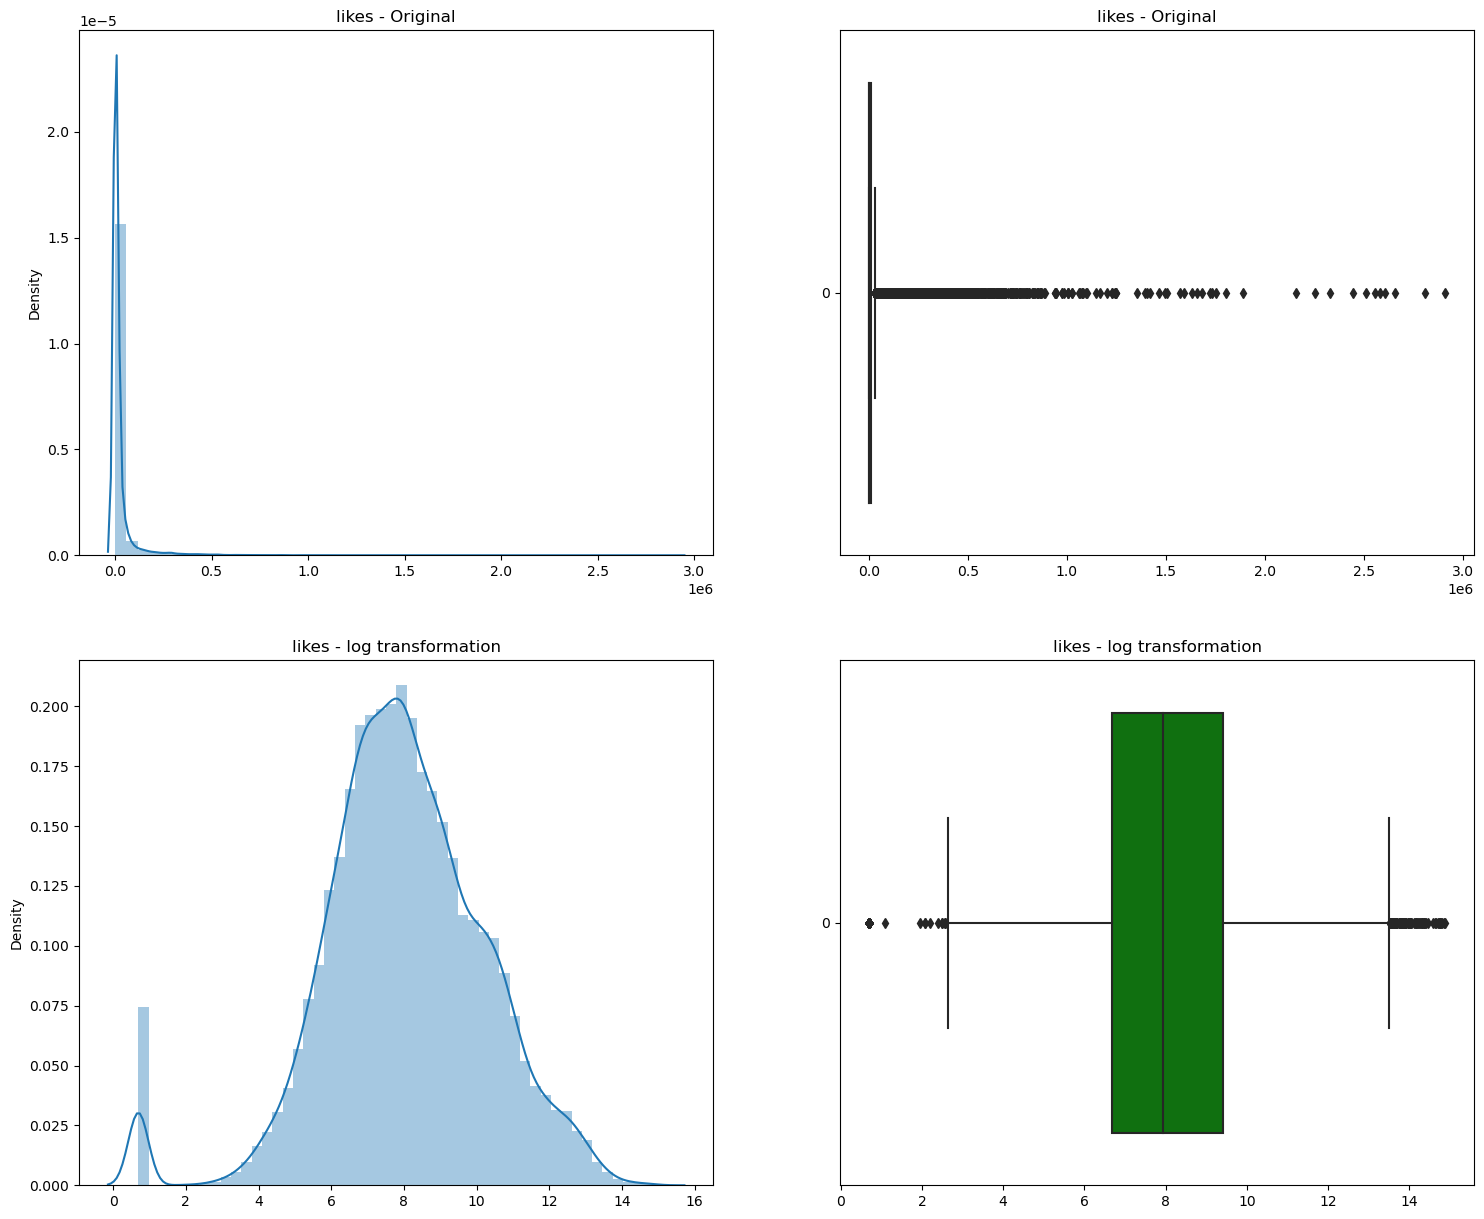

In [26]:
f,ax = plt.subplots(2,2,figsize=(18,15))

g = sns.distplot(data_clean['likes'],kde=True, ax=ax[0,0])
ax[0,0].set_title('likes - Original')
ax[0,0].set_xlabel('')

g = sns.boxplot(data_clean['likes'],color='green',orient='h', ax=ax[0,1])
ax[0,1].set_title('likes - Original')
ax[0,1].set_xlabel('')

g = sns.distplot(np.log1p(data_clean['likes']+1),kde=True, ax=ax[1,0])
ax[1,0].set_title('likes - log transformation')
ax[1,0].set_xlabel('')

g = sns.boxplot(np.log1p(data_clean['likes']+1),color='green',orient='h', ax=ax[1,1])
ax[1,1].set_title('likes - log transformation')
ax[1,1].set_xlabel('')

Text(0.5, 0, '')

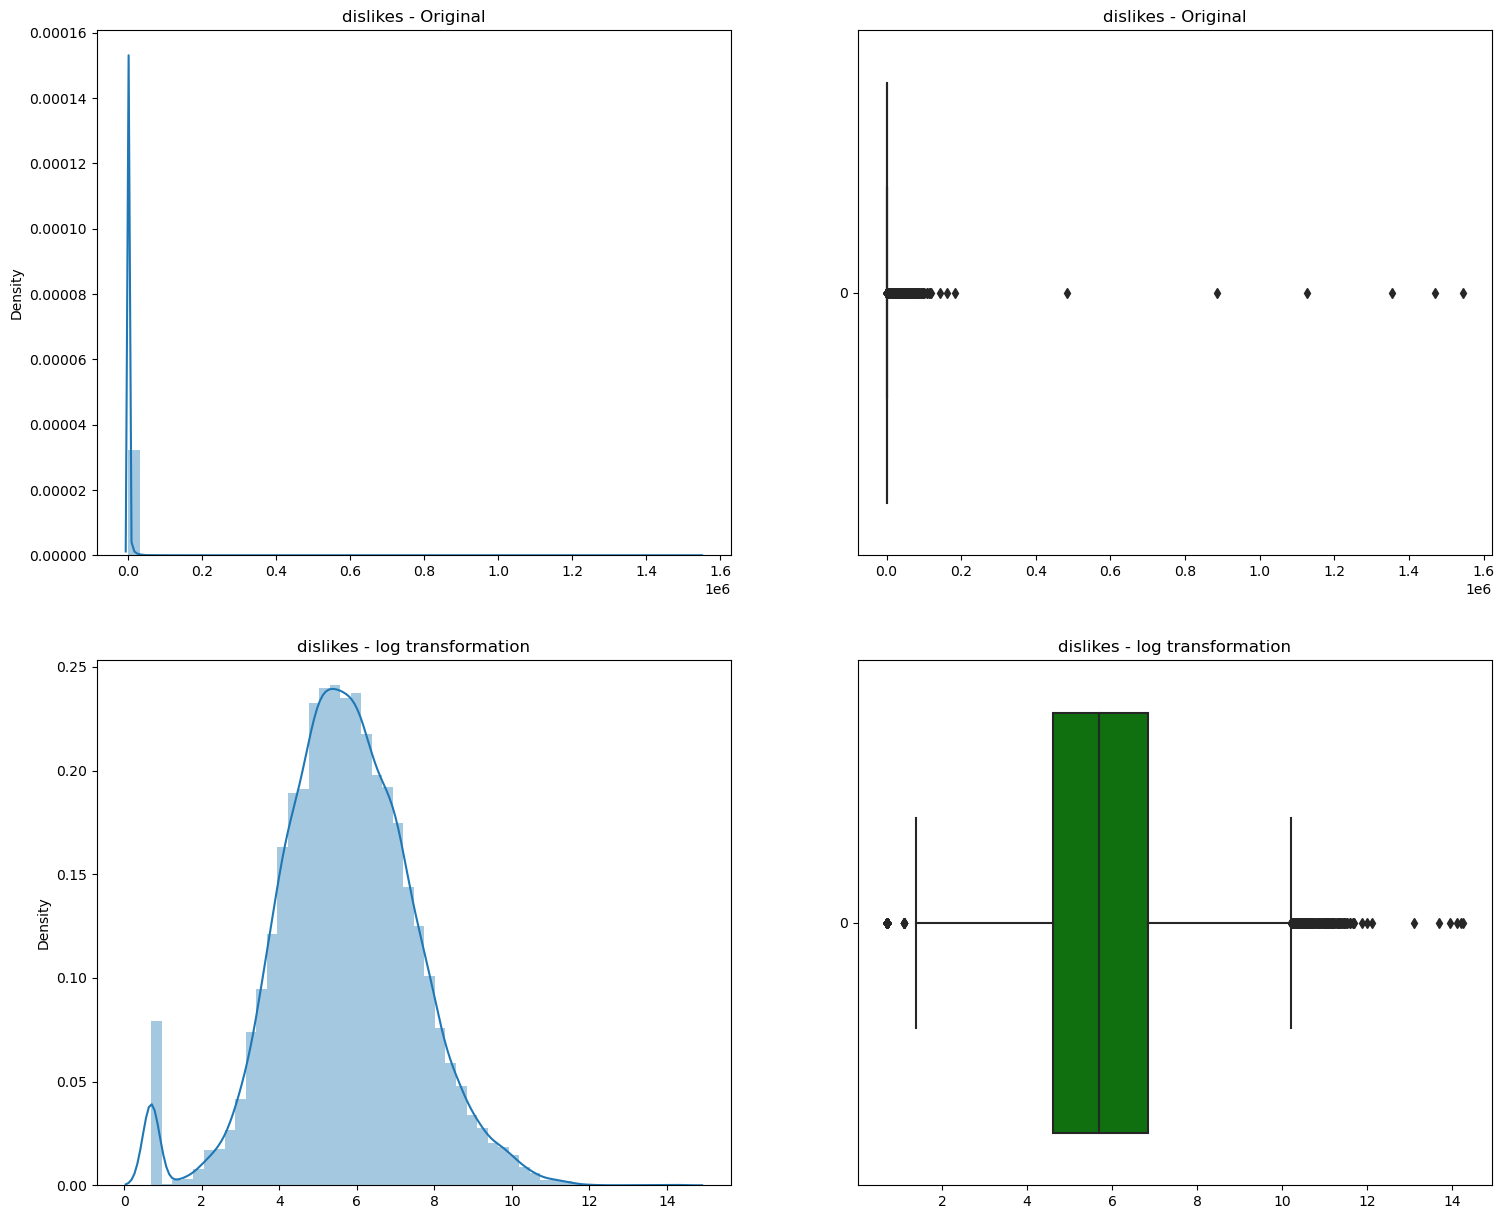

In [27]:
f,ax = plt.subplots(2,2,figsize=(18,15))

g = sns.distplot(data_clean['dislikes'],kde=True, ax=ax[0,0])
ax[0,0].set_title('dislikes - Original')
ax[0,0].set_xlabel('')

g = sns.boxplot(data_clean['dislikes'],color='green',orient='h', ax=ax[0,1])
ax[0,1].set_title('dislikes - Original')
ax[0,1].set_xlabel('')

g = sns.distplot(np.log1p(data_clean['dislikes']+1),kde=True, ax=ax[1,0])
ax[1,0].set_title('dislikes - log transformation')
ax[1,0].set_xlabel('')

g = sns.boxplot(np.log1p(data_clean['dislikes']+1),color='green',orient='h', ax=ax[1,1])
ax[1,1].set_title('dislikes - log transformation')
ax[1,1].set_xlabel('')

Text(0.5, 0, '')

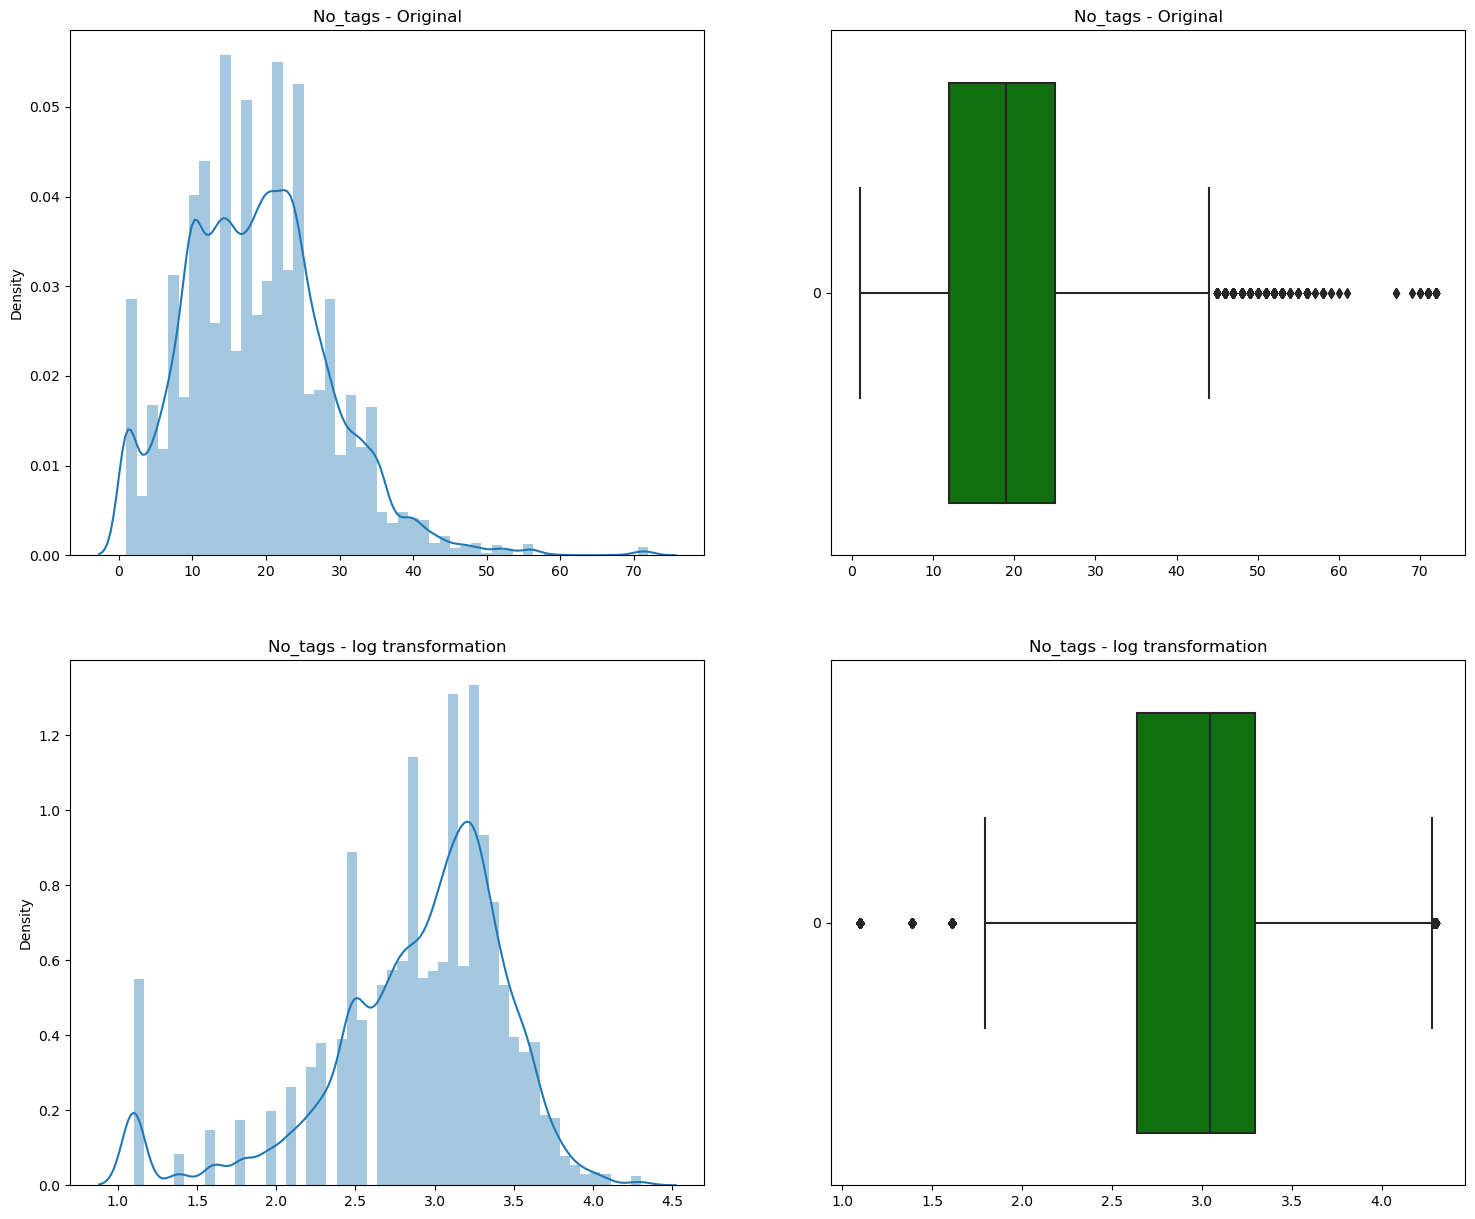

In [28]:
f,ax = plt.subplots(2,2,figsize=(18,15))

g = sns.distplot(data_clean['No_tags'],kde=True, ax=ax[0,0])
ax[0,0].set_title('No_tags - Original')
ax[0,0].set_xlabel('')

g = sns.boxplot(data_clean['No_tags'],color='green',orient='h', ax=ax[0,1])
ax[0,1].set_title('No_tags - Original')
ax[0,1].set_xlabel('')

g = sns.distplot(np.log1p(data_clean['No_tags']+1),kde=True, ax=ax[1,0])
ax[1,0].set_title('No_tags - log transformation')
ax[1,0].set_xlabel('')

g = sns.boxplot(np.log1p(data_clean['No_tags']+1),color='green',orient='h', ax=ax[1,1])
ax[1,1].set_title('No_tags - log transformation')
ax[1,1].set_xlabel('')

Text(0.5, 0, '')

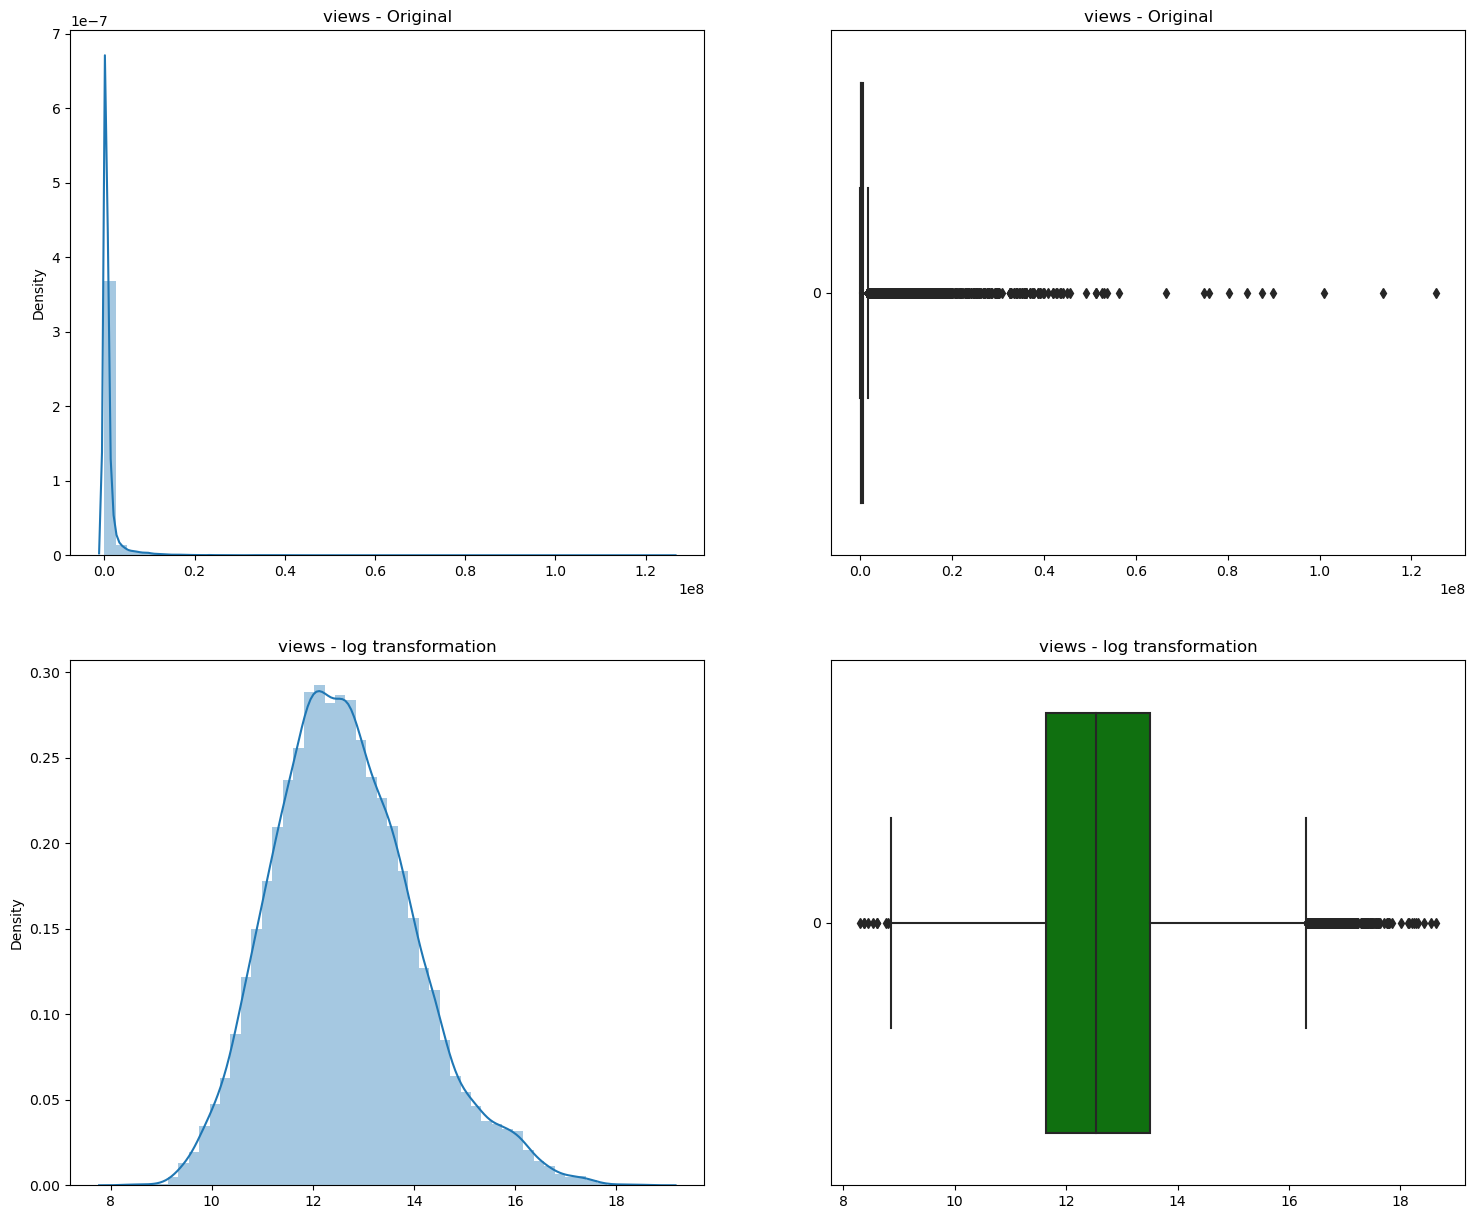

In [29]:
f,ax = plt.subplots(2,2,figsize=(18,15))

g = sns.distplot(data_clean['views'],kde=True, ax=ax[0,0])
ax[0,0].set_title('views - Original')
ax[0,0].set_xlabel('')

g = sns.boxplot(data_clean['views'],color='green',orient='h', ax=ax[0,1])
ax[0,1].set_title('views - Original')
ax[0,1].set_xlabel('')

g = sns.distplot(np.log1p(data_clean['views']+1),kde=True, ax=ax[1,0])
ax[1,0].set_title('views - log transformation')
ax[1,0].set_xlabel('')

g = sns.boxplot(np.log1p(data_clean['views']+1),color='green',orient='h', ax=ax[1,1])
ax[1,1].set_title('views - log transformation')
ax[1,1].set_xlabel('')

Text(0.5, 0, '')

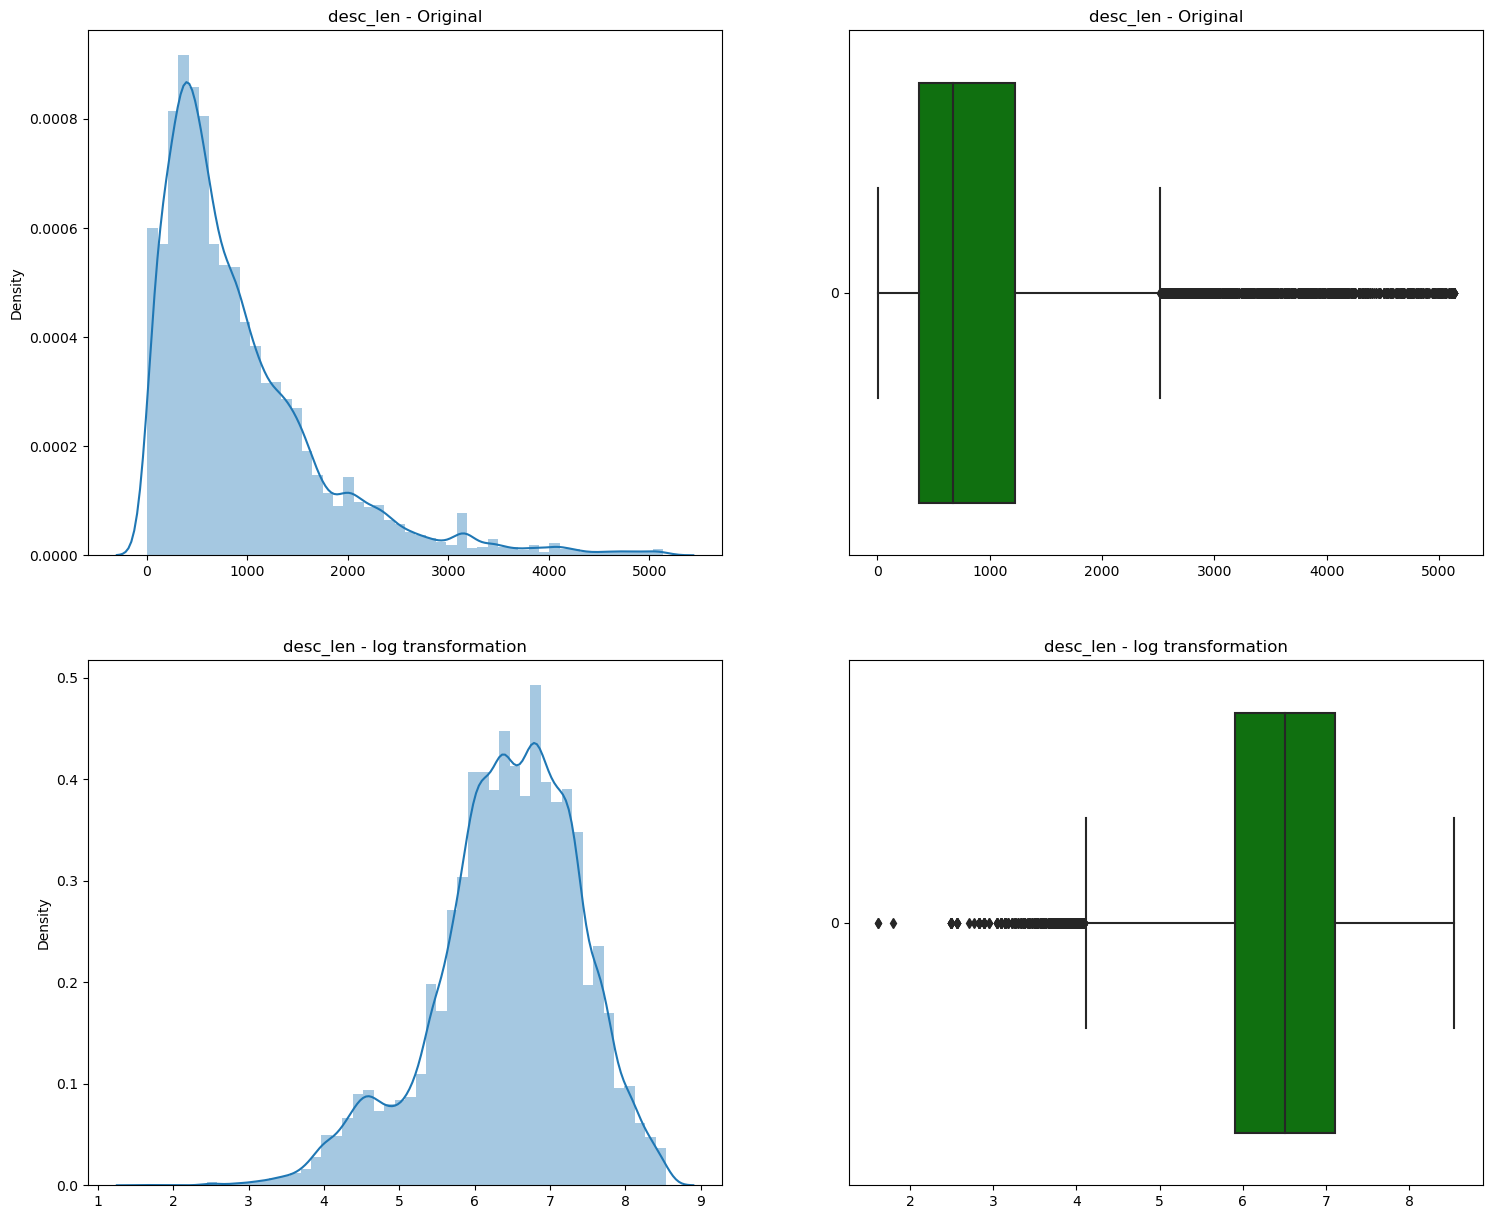

In [30]:
f,ax = plt.subplots(2,2,figsize=(18,15))

g = sns.distplot(data_clean['desc_len'],kde=True, ax=ax[0,0])
ax[0,0].set_title('desc_len - Original')
ax[0,0].set_xlabel('')

g = sns.boxplot(data_clean['desc_len'],color='green',orient='h', ax=ax[0,1])
ax[0,1].set_title('desc_len - Original')
ax[0,1].set_xlabel('')

g = sns.distplot(np.log1p(data_clean['desc_len']+1),kde=True, ax=ax[1,0])
ax[1,0].set_title('desc_len - log transformation')
ax[1,0].set_xlabel('')

g = sns.boxplot(np.log1p(data_clean['desc_len']+1),color='green',orient='h', ax=ax[1,1])
ax[1,1].set_title('desc_len - log transformation')
ax[1,1].set_xlabel('')

Text(0.5, 0, '')

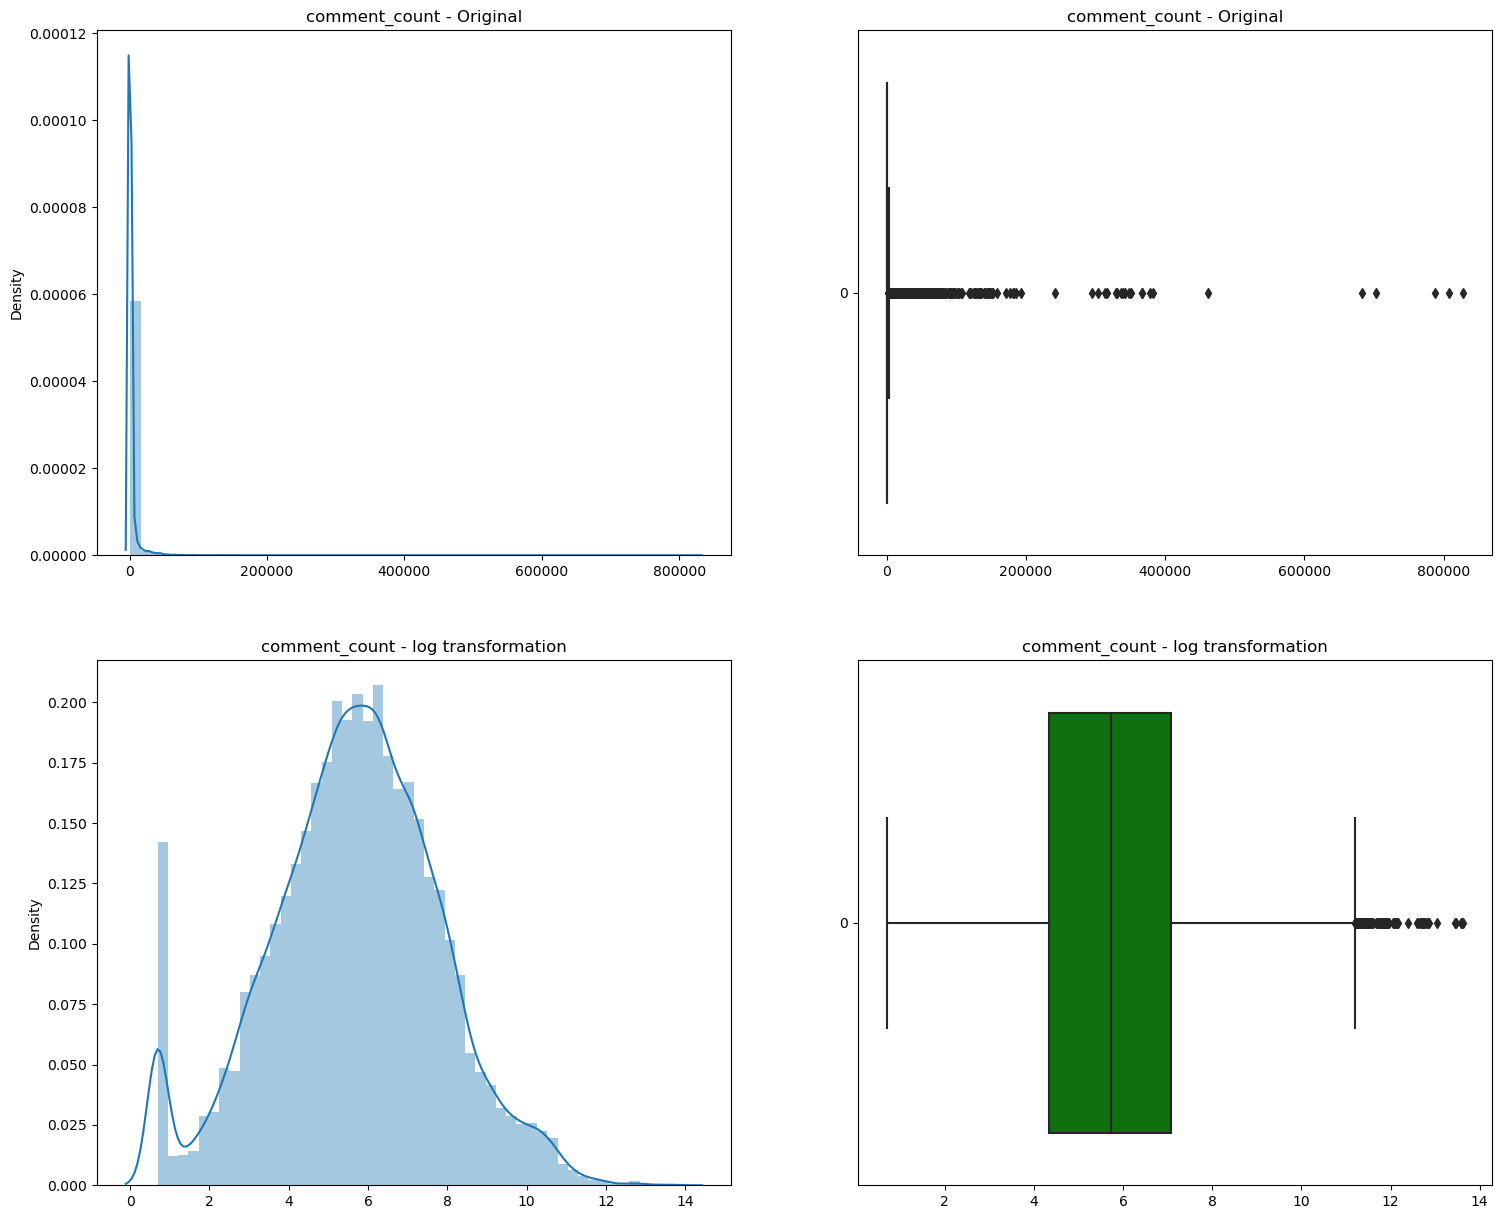

In [31]:
f,ax = plt.subplots(2,2,figsize=(18,15))

g = sns.distplot(data_clean['comment_count'],kde=True, ax=ax[0,0])
ax[0,0].set_title('comment_count - Original')
ax[0,0].set_xlabel('')

g = sns.boxplot(data_clean['comment_count'],color='green',orient='h', ax=ax[0,1])
ax[0,1].set_title('comment_count - Original')
ax[0,1].set_xlabel('')

g = sns.distplot(np.log1p(data_clean['comment_count']+1),kde=True, ax=ax[1,0])
ax[1,0].set_title('comment_count - log transformation')
ax[1,0].set_xlabel('')

g = sns.boxplot(np.log1p(data_clean['comment_count']+1),color='green',orient='h', ax=ax[1,1])
ax[1,1].set_title('comment_count - log transformation')
ax[1,1].set_xlabel('')

## Feature engineering

---



### Buat Feature tambahan lain 

1. **feature Engagement Rate** : <br>
  Untuk menghitung rasio antara jumlah likes, dislikes, dan comments count dengan jumlah views, Fitur ini bisa memberikan informasi tentang seberapa besar persentase interaksi jumlah penonton dengan videonya.

In [32]:
# Membuat Feature Engagement Rate
data_clean['engagement_rate'] = ((data_clean['likes'] + data_clean['dislikes'] + data_clean['comment_count'])*100) / data_clean['views']
data_clean.head()

,trending_date,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,No_tags,desc_len,len_title,engagement_rate
0,2017-11-14,1,1096327,33966,798,882,False,False,False,15,920,81,3.251402
1,2017-11-14,25,590101,735,904,0,True,False,False,19,2232,58,0.277749
2,2017-11-14,24,473988,2011,243,149,False,False,False,14,482,58,0.506975
3,2017-11-14,23,1242680,70353,1624,2684,False,False,False,20,263,30,6.008063
4,2017-11-14,24,464015,492,293,66,False,False,False,11,753,88,0.183399


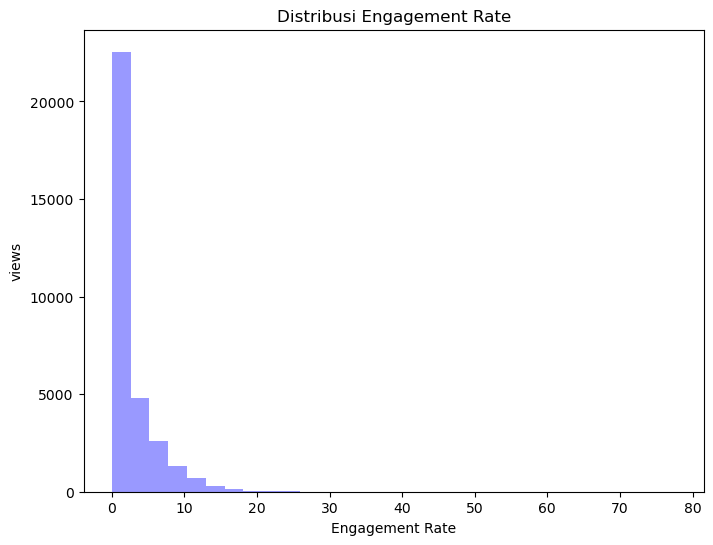

In [33]:
plt.figure(figsize=(8, 6))
sns.distplot(data_clean['engagement_rate'], kde=False, bins=30, color='blue')
plt.title('Distribusi Engagement Rate')
plt.xlabel('Engagement Rate')
plt.ylabel('views')
plt.show()

2. **feature Time Session** : <br>
Untuk mengetahui waktu yang tepat untuk publish video agar views yang didapatkan lebih optimal.<br>
Pengelompokan sesi waktu sebagai berikut:<br>
Early Day : 00.00 - 05.00<br>
Morning : 05.00 - 12.00<br>
Afternoon : 12.00 - 17.00<br>
Evening : 17.00 - 20.00<br>
Night : 20.00 - 00.00<br>


In [34]:
df['publish_time'] = pd.to_datetime(df['publish_time'], format='%H:%M:%S')
df['publish_hour'] = df['publish_time'].dt.hour
df['time_session'] = np.where(df['publish_hour'] >=20, 'Night',
                                    np.where(df['publish_hour'] >= 17, 'Evening',
                                    np.where(df['publish_hour'] >= 12, 'Afternoon',
                                    np.where(df['publish_hour'] >= 5, 'Morning', 'Early Day'))))
df.head()

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,No_tags,desc_len,len_title,publish_date,publish_hour,time_session
0,2017-11-14,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,1900-01-01 12:20:39,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,False,False,False,Presenting Sharry Mann latest Punjabi Song Cu...,15,920,81,2017-11-12,12,Afternoon
1,2017-11-14,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,1900-01-01 05:43:56,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,True,False,False,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",19,2232,58,2017-11-13,5,Morning
2,2017-11-14,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,1900-01-01 15:48:08,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,False,False,False,Watch Stylish Star Allu Arjun @ ChaySam Weddin...,14,482,58,2017-11-12,15,Afternoon
3,2017-11-14,Eruma Saani | Tamil vs English,Eruma Saani,23,1900-01-01 07:08:48,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,2684,False,False,False,This video showcases the difference between pe...,20,263,30,2017-11-12,7,Morning
4,2017-11-14,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,1900-01-01 01:14:16,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492,293,66,False,False,False,why Samantha became EMOTIONAL @ Samantha naga ...,11,753,88,2017-11-13,1,Early Day


Text(0.5, 1.0, 'Time Session Distribution')

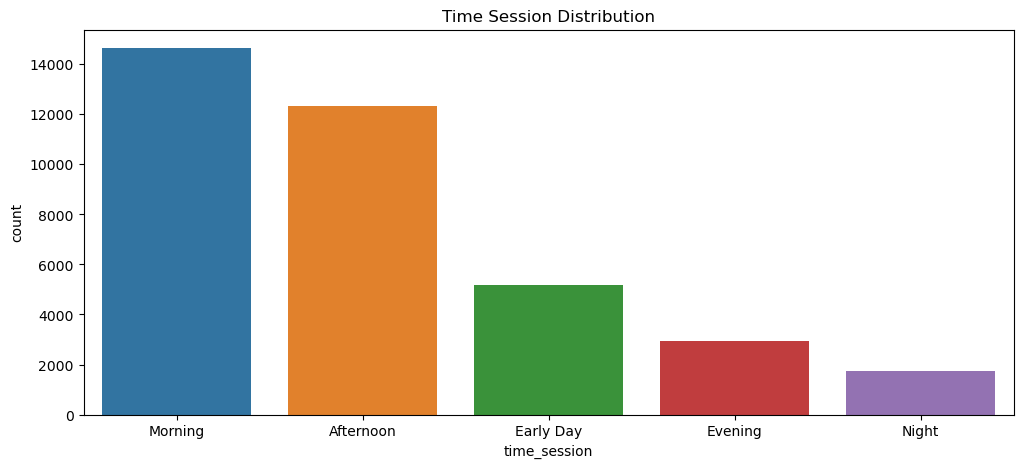

In [35]:
plt.figure(figsize=(12,5))
sns.countplot(x='time_session', data=df, order = df['time_session'].value_counts().index)
plt.title('Time Session Distribution')

Text(0.5, 1.0, 'Distribution of Views by Time Session')

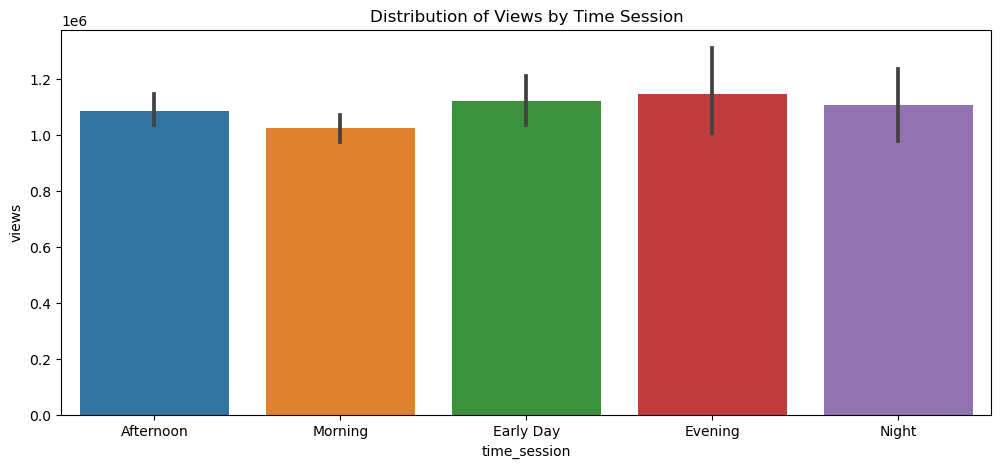

In [36]:
plt.figure(figsize=(12,5))
sns.barplot(x='time_session', y ='views', data=df)
plt.title('Distribution of Views by Time Session')

**3. feature Days_Name :**<br>
Untuk mengetahui hari yang tepat untuk publish video agar views yang didapatkan lebih optimal.<br>
Pengelompokan hari sebagai berikut:<br>
0 = Monday<br>
1 = Tuesday<br>
2 = Wednesday<br>
3 = Thursday<br>
4 = Friday<br>
5 = Saturday<br>
6 = Sunday

In [37]:
df['publish_date_number'] = df['publish_date'].dt.weekday
df['publish_day_name'] = df['publish_date'].dt.day_name()
df.head()

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,...,video_error_or_removed,description,No_tags,desc_len,len_title,publish_date,publish_hour,time_session,publish_date_number,publish_day_name
0,2017-11-14,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,1900-01-01 12:20:39,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,...,False,Presenting Sharry Mann latest Punjabi Song Cu...,15,920,81,2017-11-12,12,Afternoon,6,Sunday
1,2017-11-14,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,1900-01-01 05:43:56,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,...,False,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",19,2232,58,2017-11-13,5,Morning,0,Monday
2,2017-11-14,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,1900-01-01 15:48:08,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,...,False,Watch Stylish Star Allu Arjun @ ChaySam Weddin...,14,482,58,2017-11-12,15,Afternoon,6,Sunday
3,2017-11-14,Eruma Saani | Tamil vs English,Eruma Saani,23,1900-01-01 07:08:48,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,2684,...,False,This video showcases the difference between pe...,20,263,30,2017-11-12,7,Morning,6,Sunday
4,2017-11-14,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,1900-01-01 01:14:16,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492,293,66,...,False,why Samantha became EMOTIONAL @ Samantha naga ...,11,753,88,2017-11-13,1,Early Day,0,Monday


Text(0.5, 1.0, 'Publish Days Distribution')

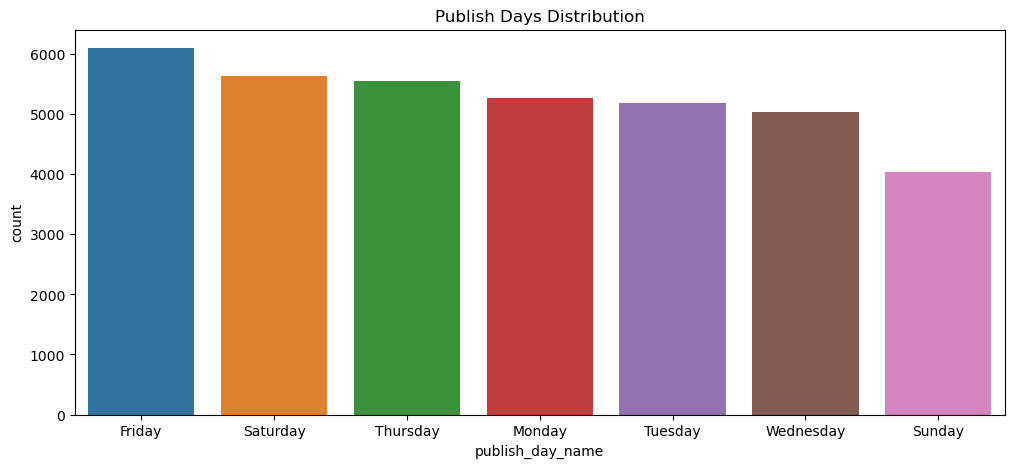

In [38]:
plt.figure(figsize=(12,5))
sns.countplot(x='publish_day_name', data=df, order = df['publish_day_name'].value_counts().index)
plt.title('Publish Days Distribution')

Text(0.5, 1.0, 'Publish Days by Views by Time Session')

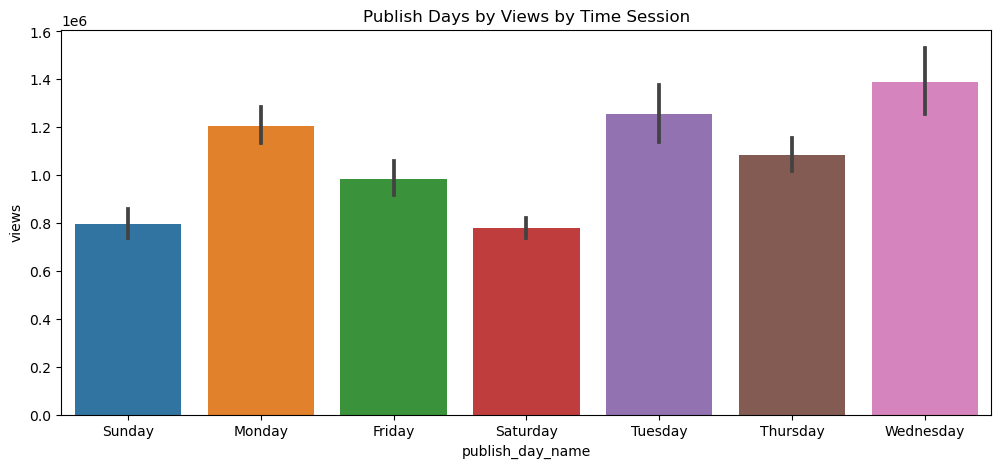

In [39]:
plt.figure(figsize=(12,5))
sns.barplot(x='publish_day_name', y ='views', data=df)
plt.title('Publish Days by Views by Time Session')

## Normalisasi

In [40]:
features = ['category_id','views','likes','dislikes','comment_count','No_tags','desc_len','len_title', 'engagement_rate']

df_pre = data_clean.copy()
for var in features:
    df_pre['log_'+var]= (data_clean[var]+1).apply(np.log)

In [41]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
for var in features:
    df_pre['std_'+var]= MinMaxScaler().fit_transform(df_pre[var].values.reshape(len(df_pre), 1))

In [42]:
data_clean.describe()

,category_id,views,likes,dislikes,comment_count,No_tags,desc_len,len_title,engagement_rate
count,32562.000000,3.256200e+04,3.256200e+04,3.256200e+04,32562.000000,32562.000000,32562.000000,32562.000000,32562.000000
mean,21.602420,1.007091e+06,2.595444e+04,1.596781e+03,2561.672747,18.849057,913.270684,70.995670,2.614238
std,6.525405,3.171556e+06,9.720113e+04,1.703103e+04,14885.907004,9.863164,807.088596,22.280423,3.456702
min,1.000000,4.024000e+03,0.000000e+00,0.000000e+00,0.000000,1.000000,3.000000,5.000000,0.000000
25%,23.000000,1.141622e+05,8.000000e+02,9.900000e+01,74.000000,12.000000,366.000000,54.000000,0.577766
50%,24.000000,2.777880e+05,2.817000e+03,2.930000e+02,306.000000,19.000000,673.000000,75.000000,1.204713
75%,24.000000,7.389245e+05,1.229900e+04,9.430000e+02,1188.000000,25.000000,1226.000000,91.000000,3.357719
max,43.000000,1.254322e+08,2.912710e+06,1.545017e+06,827755.000000,72.000000,5136.000000,100.000000,77.648511


In [43]:
df_pre.head()

,trending_date,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,No_tags,...,log_engagement_rate,std_category_id,std_views,std_likes,std_dislikes,std_comment_count,std_No_tags,std_desc_len,std_len_title,std_engagement_rate
0,2017-11-14,1,1096327,33966,798,882,False,False,False,15,...,1.447249,0.000000,0.008709,0.011661,0.000516,0.001066,0.197183,0.178648,0.800000,0.041873
1,2017-11-14,25,590101,735,904,0,True,False,False,19,...,0.245100,0.571429,0.004673,0.000252,0.000585,0.000000,0.253521,0.434249,0.557895,0.003577
2,2017-11-14,24,473988,2011,243,149,False,False,False,14,...,0.410104,0.547619,0.003747,0.000690,0.000157,0.000180,0.183099,0.093318,0.557895,0.006529
3,2017-11-14,23,1242680,70353,1624,2684,False,False,False,20,...,1.947061,0.523810,0.009875,0.024154,0.001051,0.003243,0.267606,0.050653,0.263158,0.077375
4,2017-11-14,24,464015,492,293,66,False,False,False,11,...,0.168391,0.547619,0.003667,0.000169,0.000190,0.000080,0.140845,0.146113,0.873684,0.002362


### Summary Hasil Data Preprocessing

In [44]:
print("Data Sebelum Preprocessing adalah ", len(df))
print("Data Setelah Preprocessing adalah ", len(df_pre))

Data Sebelum Preprocessing adalah  36791
Data Setelah Preprocessing adalah  32562


## Split Data

#### Melihat Korelasi Fitur

<Axes: >

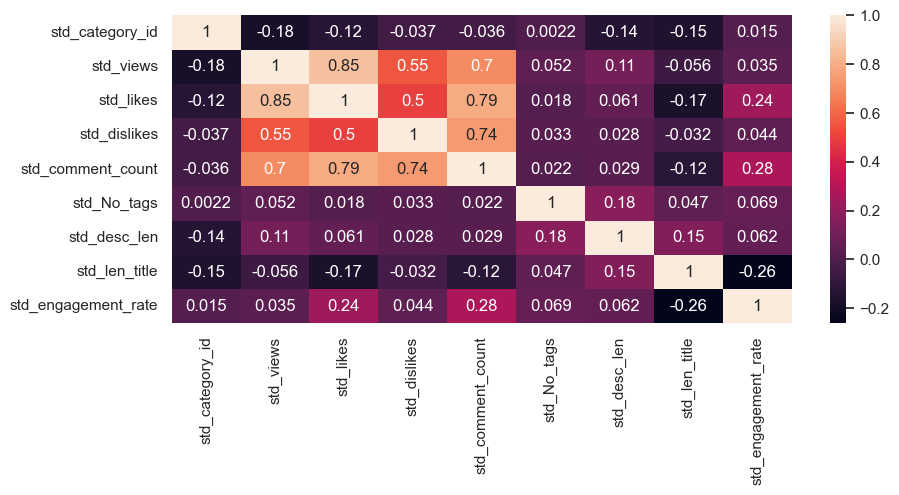

In [45]:
sns.set(rc={'figure.figsize':(10,4)})
sns.heatmap(df_pre[['std_category_id','std_views','std_likes','std_dislikes','std_comment_count','std_No_tags','std_desc_len','std_len_title','std_engagement_rate']].corr(), annot=True)

####Menetukan Fitur dan Target

In [46]:
x = df_pre[['std_category_id','std_likes','std_dislikes','std_comment_count','std_No_tags','std_desc_len','std_len_title', 'engagement_rate']]
y = df_pre['std_views']

#### Melakukan Splitting Data

In [47]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.3, random_state=42)

In [48]:
num_train_samples, num_features = xtrain.shape
num_test_samples, num_features = xtest.shape

print("Jumlah training samples:", num_train_samples)
print("Jumlah testing samples:", num_test_samples)


Jumlah training samples: 22793
Jumlah testing samples: 9769


In [49]:
xtrain

,std_category_id,std_likes,std_dislikes,std_comment_count,std_No_tags,std_desc_len,std_len_title,engagement_rate
20257,0.547619,0.000145,0.000036,0.000028,0.366197,0.090006,0.515789,0.389830
1216,0.547619,0.000407,0.000083,0.000435,0.154930,0.072083,0.705263,1.653537
33804,0.000000,0.008250,0.000073,0.001099,0.380282,0.428404,1.000000,9.857299
36295,0.547619,0.001807,0.000682,0.000634,0.084507,0.434249,0.400000,0.844021
10227,0.523810,0.004373,0.000226,0.001857,0.422535,0.070134,0.463158,10.270494
...,...,...,...,...,...,...,...,...
32984,0.214286,0.012581,0.002305,0.002943,0.295775,0.293590,0.800000,0.686375
5437,0.547619,0.000017,0.000014,0.000010,0.478873,0.040522,0.978947,0.181205
860,0.547619,0.000046,0.000104,0.000021,0.281690,0.223261,0.978947,0.158402
16073,0.380952,0.002109,0.000416,0.000360,0.577465,0.049094,0.989474,0.643807


In [50]:
xtest

,std_category_id,std_likes,std_dislikes,std_comment_count,std_No_tags,std_desc_len,std_len_title,engagement_rate
14253,0.571429,0.000640,0.000305,0.000536,0.281690,0.145724,0.452632,1.065179
23082,0.619048,0.001050,0.000428,0.000338,0.394366,0.118644,1.000000,0.994014
31715,0.523810,0.000415,0.000054,0.000075,0.450704,0.041691,0.631579,1.449819
5714,0.619048,0.000882,0.000056,0.000205,0.352113,0.152932,0.957895,4.904121
7874,0.547619,0.001248,0.000226,0.000664,0.098592,0.037989,0.852632,1.009849
...,...,...,...,...,...,...,...,...
36659,0.547619,0.007396,0.001669,0.001510,0.450704,0.304111,0.231579,5.405440
21663,0.619048,0.001750,0.000283,0.001618,0.394366,0.057861,0.378947,4.119583
32521,0.571429,0.000384,0.000287,0.000313,0.140845,0.068966,0.568421,0.558587
27131,0.547619,0.000800,0.000153,0.000243,0.014085,0.081434,0.652632,1.019975


### Fitur mana yang sebaiknya digunakan dari hasil EDA?




std_category_id , std_likes , std_dislikes, std_comment_count,std_No_tags , std_desc_len , std_len_title , engagement_rate.

# Modeling

## Training model & prediksi views

---



### Model Linear Regresi

In [51]:
#Training Set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(xtrain, ytrain)

LinearRegression()

In [52]:
#Testing Set
pred = regressor.predict(xtest)

In [53]:
np.exp(pred).round() # inverse log transform

array([1., 1., 1., ..., 1., 1., 1.])

##  Evaluasi model

---



In [54]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
def eval_regression(model, pred, xtrain, ytrain, xtest, ytest):
    print("MAE: %.2f" % mean_absolute_error(ytest, pred))
    print("RMSE: %.2f" % mean_squared_error(ytest, pred, squared=False))
    print('R2 score: %.2f' % r2_score(ytest, pred))

In [55]:
pred = regressor.predict(xtest)

print('Coefficients: \n', regressor.coef_) # slope
print('Intercept: \n', regressor.intercept_) # Intercept

eval_regression(regressor, pred, xtrain, ytrain, xtest,ytest)

Coefficients: 
 [-0.00958205  0.63630235  0.45010222 -0.13047829  0.00538591  0.00825197
  0.00293482 -0.00105707]
Intercept: 
 0.0048321462264166275
MAE: 0.01
RMSE: 0.01
R2 score: 0.80


### Ridge

In [56]:
from sklearn.linear_model import Ridge
ridge_model = Ridge()
ridge_model.fit(xtrain, ytrain)

Ridge()

In [57]:
pred = ridge_model.predict(xtest)

print('Coefficients: \n', ridge_model.coef_) #  slope
print('Intercept: \n', ridge_model.intercept_) #  Intercept

eval_regression(ridge_model, pred, xtrain, ytrain, xtest, ytest)

Coefficients: 
 [-0.01126351  0.56569942  0.23445668  0.06530324  0.00579439  0.00902913
  0.00201299 -0.00116547]
Intercept: 
 0.006580916220205903
MAE: 0.01
RMSE: 0.01
R2 score: 0.79


###Hyperparameter Tunning Pada Ridge dengan Randomized Search

In [58]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

alpha = [200, 230, 250, 265, 270, 275, 290, 300, 500] # alpha
hyperparameters = dict(alpha=alpha)

from sklearn.linear_model import Ridge
ridge_model = Ridge()
clf = RandomizedSearchCV(ridge_model, hyperparameters, cv=5, random_state=42, scoring='r2')

#Fitting Model
best_model = clf.fit(xtrain, ytrain)

In [59]:
pred = best_model.predict(xtest)
eval_regression(best_model, pred, xtrain, ytrain, xtest, ytest)

MAE: 0.01
RMSE: 0.02
R2 score: 0.21


### Lasso

In [60]:
from sklearn.linear_model import Lasso
lasso_model = Lasso()
lasso_model.fit(xtrain, ytrain)

Lasso()

In [61]:
pred = lasso_model.predict(xtest)
eval_regression(lasso_model, pred, xtrain, ytrain, xtest, ytest)

MAE: 0.01
RMSE: 0.03
R2 score: -0.00


### Hyperparameter Tunning Pada Ridge dengan Randomized Search

In [62]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

alpha = [0.02, 0.022, 0.025, 0.026, 0.029] # alpha or lambda

hyperparameters = dict(alpha=alpha)

from sklearn.linear_model import Lasso
lasso_model = Lasso()
clf = RandomizedSearchCV(lasso_model, hyperparameters, cv=5, random_state=42, scoring='r2')

#Fitting Model
best_model = clf.fit(xtrain, ytrain)

In [63]:
pred = best_model.predict(xtest)
eval_regression(best_model, pred, xtrain, ytrain, xtest, ytest)

MAE: 0.01
RMSE: 0.03
R2 score: -0.00


### Elastic Net

In [64]:
from sklearn.linear_model import ElasticNet

elasticnet_model = ElasticNet()
elasticnet_model.fit(xtrain, ytrain)

ElasticNet()

In [65]:
pred = elasticnet_model.predict(xtest)
eval_regression(elasticnet_model, pred, xtrain, ytrain, xtest, ytest)

MAE: 0.01
RMSE: 0.03
R2 score: -0.00


## Hyperparamter Tunning Elastic

In [66]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
import numpy as np

alpha = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0]
l1_ratio = np.arange(0, 1, 0.01)

hyperparameters = dict(alpha=alpha, l1_ratio=l1_ratio)

from sklearn.linear_model import ElasticNet
elasticnet_model = ElasticNet()
clf = RandomizedSearchCV(elasticnet_model, hyperparameters, cv=5, random_state=42, scoring='r2')

# Fitting Model
best_model = clf.fit(xtrain, ytrain)


In [67]:
pred = best_model.predict(xtest)
eval_regression(best_model, pred, xtrain, ytrain, xtest, ytest)

MAE: 0.01
RMSE: 0.01
R2 score: 0.80


### Model Decision Tree

In [68]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
dt.fit(xtrain, ytrain)
pred = dt.predict(xtest)
eval_regression(dt, pred, xtrain, ytrain, xtest, ytest)

MAE: 0.00
RMSE: 0.00
R2 score: 0.98


### Model Random Forest

In [69]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=104)
best_model1 = rf.fit(xtrain, ytrain)
pred = rf.predict(xtest)
eval_regression(rf, pred, xtrain, ytrain, xtest, ytest)

MAE: 0.00
RMSE: 0.00
R2 score: 1.00


### Model Support Vector Regressor

In [70]:
from sklearn.svm import SVR

svr = SVR()
svr.fit(xtrain, ytrain)
pred = svr.predict(xtest)
eval_regression(svr, pred, xtrain, ytrain, xtest, ytest)

MAE: 0.10
RMSE: 0.10
R2 score: -11.79



***Model Random Forest*** memiliki performa yang lebih baik dibandingkan dengan metode lainnya, dengan nilai R2 yang paling tinggi dibandingkan metode regresi lainnya dan tidak memiliki nilai RMSE.


---

